In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stats

In [2]:
datafile = "CCM Computing Literacy Course Entry Survey - Fall 2021.csv"
df = pd.read_csv(datafile)

In [3]:
pd.set_option('precision', 2)

In [4]:
df.head()

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
0,2021/10/04 1:43:00 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,No,No,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,Woman,Choose not to reply,65+
1,2021/10/04 2:15:38 PM EST,CMP 126 Computer Technology and Applications,Yes,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,Non-binary,Hispanic or Latino;Multi-Racial,19-20
2,2021/10/04 3:06:08 PM EST,CMP 126 Computer Technology and Applications,No,Yes,Yes,No,Yes,No,No,No,...,Yes,No,Yes,Yes,Yes,No,Yes,Man,Hispanic or Latino,19-20
3,2021/10/04 6:32:07 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20
4,2021/10/05 7:22:53 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


In [5]:
df.sample(3,random_state=3)

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
42,2021/10/06 9:47:37 PM EST,CMP 135 Computer Concepts with Applications,Yes,Yes,No,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,Man,Black/African American,19-20
102,2021/10/15 12:28:44 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Woman,Hispanic or Latino,21-24
5,2021/10/05 7:25:38 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,21-24


In [6]:
df.columns

Index(['Timestamp', 'Which course are you currently enrolled in?',
       'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]',
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]',
       'What motivated you to seek a computing class at CCM? [Career Advancement]',
       'What motivated you to seek a computing class at CCM? [Career Change]',
       'What motivated you to seek a computing class at CCM? [Professional Development]',
       'What motivated you to seek a computing class at CCM? [Job Displacement]',
       'What motivated you to seek a computing class at CCM? [Relocation]',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]',
       'What motivated you to seek a computing class at CCM? [Financial]',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]',
       'What motivated you to seek a computing class at

In [7]:
df.dtypes

Timestamp                                                                                                                                    object
Which course are you currently enrolled in?                                                                                                  object
What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]                                      object
What motivated you to seek a computing class at CCM? [To keep current in computing skills]                                                   object
What motivated you to seek a computing class at CCM? [Career Advancement]                                                                    object
                                                                                                                                              ...  
If you answered that you were interested in taking more computing classes, which ones interest you most? [Game D

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                           --------------  ----- 
 0   Timestamp                                                                                                                                                                                                                                        122 non-null    object
 1   Which course are you currently enrolled in?                                        

In [9]:
course = df['Which course are you currently enrolled in?']
course

0      CMP 126 Computer Technology and Applications
1      CMP 126 Computer Technology and Applications
2      CMP 126 Computer Technology and Applications
3             CMP 101 Computer Information Literacy
4      CMP 126 Computer Technology and Applications
                           ...                     
117           CMP 101 Computer Information Literacy
118     CMP 135 Computer Concepts with Applications
119     CMP 135 Computer Concepts with Applications
120     CMP 135 Computer Concepts with Applications
121     CMP 135 Computer Concepts with Applications
Name: Which course are you currently enrolled in?, Length: 122, dtype: object

In [10]:
course.value_counts() 

CMP 126 Computer Technology and Applications    58
CMP 135 Computer Concepts with Applications     40
CMP 101 Computer Information Literacy           24
Name: Which course are you currently enrolled in?, dtype: int64

Shows what classes the people that took the survey are in.

In [20]:
interestlevel = df[df['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?']>4]
interestlevel

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
17,2021/10/06 12:30:39 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Hispanic or Latino,19-20
26,2021/10/06 5:44:22 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Man,White/Caucasian,21-24
40,2021/10/06 9:11:18 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Choose not to reply,25-34
41,2021/10/06 9:23:09 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Choose not to reply,25-34
72,2021/10/12 7:46:49 AM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,White/Caucasian,19-20
75,2021/10/12 12:25:23 PM EST,CMP 135 Computer Concepts with Applications,Yes,Yes,No,No,Yes,No,No,No,...,Yes,Yes,No,No,Yes,No,Yes,Woman,White/Caucasian,35-64
84,2021/10/13 10:32:16 PM EST,CMP 135 Computer Concepts with Applications,Yes,Yes,Yes,Yes,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,Man,Black/African American,25-34
85,2021/10/14 8:13:20 AM EST,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,No,No,Man,Asian,35-64
90,2021/10/14 12:51:44 PM EST,CMP 135 Computer Concepts with Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,Yes,No,No,No,Man,Asian,35-64
97,2021/10/15 2:21:01 AM EST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,Yes,Yes,No,No,No,...,No,No,No,Yes,No,No,Yes,Man,White/Caucasian,25-34


Shows the data for students who had an interest level of 5

In [21]:
df['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?'].mean()


2.7540983606557377

This code shows us the average interest level to be pretty low. 

In [22]:
interestlevel

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
17,2021/10/06 12:30:39 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Hispanic or Latino,19-20
26,2021/10/06 5:44:22 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Man,White/Caucasian,21-24
40,2021/10/06 9:11:18 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Choose not to reply,25-34
41,2021/10/06 9:23:09 PM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Woman,Choose not to reply,25-34
72,2021/10/12 7:46:49 AM EST,CMP 101 Computer Information Literacy,Yes,Yes,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,White/Caucasian,19-20
75,2021/10/12 12:25:23 PM EST,CMP 135 Computer Concepts with Applications,Yes,Yes,No,No,Yes,No,No,No,...,Yes,Yes,No,No,Yes,No,Yes,Woman,White/Caucasian,35-64
84,2021/10/13 10:32:16 PM EST,CMP 135 Computer Concepts with Applications,Yes,Yes,Yes,Yes,Yes,No,No,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,Man,Black/African American,25-34
85,2021/10/14 8:13:20 AM EST,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,No,No,No,No,Man,Asian,35-64
90,2021/10/14 12:51:44 PM EST,CMP 135 Computer Concepts with Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,Yes,Yes,No,No,No,Man,Asian,35-64
97,2021/10/15 2:21:01 AM EST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,Yes,Yes,No,No,No,...,No,No,No,Yes,No,No,Yes,Man,White/Caucasian,25-34


In [23]:
df['On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?'].value_counts() 

3    44
2    29
1    21
4    15
5    13
Name: On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?, dtype: int64

This shows us how interested most people are. Most are only somewhat interested. It is interesting to note that more are not that interested then really interested.

In [24]:
df.drop(axis=1, columns=['What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]', 'What motivated you to seek a computing class at CCM? [To keep current in computing skills]', 'What motivated you to seek a computing class at CCM? [Career Advancement]', 'What motivated you to seek a computing class at CCM? [Career Change]', 'What motivated you to seek a computing class at CCM? [Professional Development]','What motivated you to seek a computing class at CCM? [Job Displacement]','What motivated you to seek a computing class at CCM? [Relocation]',
'What motivated you to seek a computing class at CCM? [IT Industry Certifications]','What motivated you to seek a computing class at CCM? [Financial]',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]',
       'What motivated you to seek a computing class at CCM? [Curiosity]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Open House]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Instant Decision Day]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [On-Campus Information Session]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]',
       'To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]', 'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]',
       'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]',
       'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]',
       'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]',
       'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]',
       'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]',
       'To what extent did the following impact your decision to attend County College of Morris? [College reputation]',
       'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]',
       'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]',
       'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]',
       'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]','Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Women Who Dare]',
       'Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [Regional College Fair]'])

,Timestamp,Which course are you currently enrolled in?,"Prior to applying to college, did you participate in any of the following events or activities at the County College of Morris and/or with the Department of Information Technologies, if at all? [TItan's Tuesday Virtual Information Session]",How did you hear about County College of Morris [CCM Web site],How did you hear about County College of Morris [Billboard],How did you hear about County College of Morris [Television],How did you hear about County College of Morris [Radio],How did you hear about County College of Morris [Social Media],How did you hear about County College of Morris [Community Event],How did you hear about County College of Morris [Family member or friend],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
0,2021/10/04 1:43:00 PM EST,CMP 126 Computer Technology and Applications,No,No,Yes,No,No,No,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,Woman,Choose not to reply,65+
1,2021/10/04 2:15:38 PM EST,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,Non-binary,Hispanic or Latino;Multi-Racial,19-20
2,2021/10/04 3:06:08 PM EST,CMP 126 Computer Technology and Applications,Yes,Yes,No,No,No,Yes,No,Yes,...,Yes,No,Yes,Yes,Yes,No,Yes,Man,Hispanic or Latino,19-20
3,2021/10/04 6:32:07 PM EST,CMP 101 Computer Information Literacy,No,Yes,Yes,No,No,No,Yes,Yes,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20
4,2021/10/05 7:22:53 PM EST,CMP 126 Computer Technology and Applications,No,No,Yes,No,No,No,Yes,Yes,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021/10/23 8:37:06 PM EST,CMP 101 Computer Information Literacy,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Man,Hispanic or Latino,21-24
118,2021/10/24 8:32:53 PM EST,CMP 135 Computer Concepts with Applications,No,Yes,No,No,No,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,Woman,Hispanic or Latino;White/Caucasian,19-20
119,2021/10/27 8:50:01 PM EST,CMP 135 Computer Concepts with Applications,No,Yes,Yes,No,No,Yes,No,Yes,...,No,No,Yes,Yes,No,No,No,Man,Black/African American,25-34
120,2021/11/02 4:43:32 PM EST,CMP 135 Computer Concepts with Applications,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


In [25]:
df.columns

Index(['Timestamp', 'Which course are you currently enrolled in?',
       'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]',
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]',
       'What motivated you to seek a computing class at CCM? [Career Advancement]',
       'What motivated you to seek a computing class at CCM? [Career Change]',
       'What motivated you to seek a computing class at CCM? [Professional Development]',
       'What motivated you to seek a computing class at CCM? [Job Displacement]',
       'What motivated you to seek a computing class at CCM? [Relocation]',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]',
       'What motivated you to seek a computing class at CCM? [Financial]',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]',
       'What motivated you to seek a computing class at

In [26]:
df.shape

(122, 71)

In [27]:
df['Gender'].value_counts()

Woman                76
Man                  42
Non-binary            2
Prefer not to say     2
Name: Gender, dtype: int64

This code shows us that more woman took the survey than the number of men.

In [28]:
df['Race/ethnicity'].value_counts()

White/Caucasian                                                  57
Hispanic or Latino                                               32
Choose not to reply                                              10
Black/African American                                            8
Asian                                                             6
Hispanic or Latino;White/Caucasian                                4
Hispanic or Latino;Multi-Racial                                   1
Hispanic or Latino;White/Caucasian;Multi-Racial                   1
Hispanic or Latino;Asian                                          1
American Indian/Native American/Alaska Native;White/Caucasian     1
American Indian/Native American/Alaska Native                     1
Name: Race/ethnicity, dtype: int64

A list of the races that are taking the course. Perhaps CCM should get more black african american people enrolled in the courses,

In [31]:
df['Age '].value_counts()

19-20             53
21-24             21
25-34             18
18 and younger    17
35-64             11
65+                2
Name: Age , dtype: int64

This code shows the ages who are taking the course and filled out the survey. The amount of students 18 and younger is very impressive.  CCM should try to keep that that way

In [32]:
data1 = df[['What degree program are you currently enrolled in?', 'Gender','Race/ethnicity','Age ', 'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?']]
data1.rename(
    columns=({ 'Age ': 'Age', 'What degree program are you currently enrolled in?' : 'Degree', 'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'InterestLevel'
             }), 
    inplace=True,
)

C:\Users\cjkar\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
data1

,Degree,Gender,Race/ethnicity,Age,InterestLevel
0,Criminal Justice,Woman,Choose not to reply,65+,3
1,Broadcasting Arts and Technology,Non-binary,Hispanic or Latino;Multi-Racial,19-20,1
2,Liberal Arts,Man,Hispanic or Latino,19-20,3
3,Nursing,Woman,White/Caucasian,19-20,1
4,Child and Family Studies,Woman,White/Caucasian,19-20,3
...,...,...,...,...,...
117,Liberal Arts,Man,Hispanic or Latino,21-24,1
118,Criminal Justice,Woman,Hispanic or Latino;White/Caucasian,19-20,3
119,Radiography,Man,Black/African American,25-34,3
120,Liberal Arts,Woman,White/Caucasian,19-20,2


Here I took the data and grouped it by Degree enrolled in, gender, race, and age. Now I will do more with it

In [34]:
summary1 = data1.groupby('InterestLevel')['Degree','Race/ethnicity','Age', 'Gender'].count().reset_index()
summary1

C:\Users\cjkar\AppData\Local\Temp/ipykernel_12980/2356499665.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary1 = data1.groupby('InterestLevel')['Degree','Race/ethnicity','Age', 'Gender'].count().reset_index()


,InterestLevel,Degree,Race/ethnicity,Age,Gender
0,1,21,21,21,21
1,2,29,29,29,29
2,3,44,44,44,44
3,4,15,15,15,15
4,5,13,13,13,13


In [35]:
gender_count = data1.groupby(['Degree']).count()
gender_count

,Gender,Race/ethnicity,Age,InterestLevel
Degree,,,,
Broadcast Journalism,1,1,1,1
Broadcasting Arts and Technology,5,5,5,5
Business Administration,2,2,2,2
Child and Family Studies,6,6,6,6
Communication,6,6,6,6
Criminal Justice,13,13,13,13
Early Childhood Education,2,2,2,2
Electronic Music,1,1,1,1
Environmental Science,1,1,1,1


Text(0, 0.5, 'Number of Students')

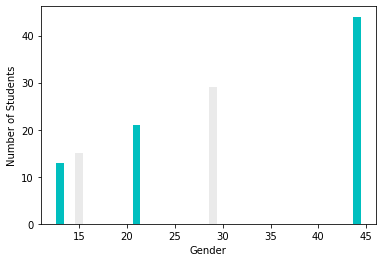

In [41]:
plt.bar(summary1.Gender, summary1.Degree, color=['c','#eaeaea'])
plt.xlabel("Gender")
plt.ylabel("Number of Students")

Although rough this bar graph shows us again that more women took the survey. Women are blue and men are gret

Text(0, 0.5, 'Number of Students')

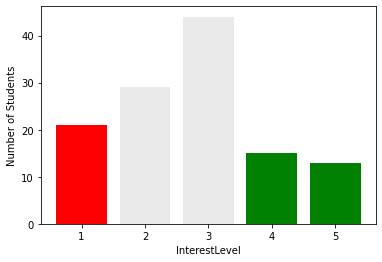

In [42]:
plt.bar(summary1.InterestLevel, summary1.Gender, color=['red','#eaeaea','#eaeaea','green', 'green'])
plt.xlabel("InterestLevel")
plt.ylabel("Number of Students")

This graph shows us the interest levels of students. 1 being the least and 5 being the most. Red is bad. Green is good